<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Pandas</p><br>

*pandas* is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python. 

*pandas* build upon *numpy* and *scipy* providing easy-to-use data structures and data manipulation functions with integrated indexing.

The main data structures *pandas* provides are *Series* and *DataFrames*. After a brief introduction to these two data structures and data ingestion, the key features of *pandas* this notebook covers are:
* Generating descriptive statistics on data
* Data cleaning using built in pandas functions
* Frequent data operations for subsetting, filtering, insertion, deletion and aggregation of data
* Merging multiple datasets using dataframes
* Working with timestamps and time-series data

**Additional Recommended Resources:**
* *pandas* Documentation: http://pandas.pydata.org/pandas-docs/stable/
* *Python for Data Analysis* by Wes McKinney
* *Python Data Science Handbook* by Jake VanderPlas

Let's get started with our first *pandas* notebook!

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Import Libraries
</p>

In [1]:
import pandas as pd

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Introduction to pandas Data Structures</p>
<br>
*pandas* has two main data structures it uses, namely, *Series* and *DataFrames*. 

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas Series</p>

*pandas Series* one-dimensional labeled array. 


In [3]:
ser = pd.Series([100, 'foo', 300, 'bar', 500], ['tom', 'bob', 'nancy', 'dan', 'eric'])

In [4]:
ser1 = pd.Series([1, 2, 3, 4,5], ['Red Dead redemption2', 'COD-Modern Warfare', 'CS:Go', "Destiny2", 'Ark survival'])
ser1

Red Dead redemption2    1
COD-Modern Warfare      2
CS:Go                   3
Destiny2                4
Ark survival            5
dtype: int64

In [5]:
ser

tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object

In [6]:

ser.index

Index(['tom', 'bob', 'nancy', 'dan', 'eric'], dtype='object')

In [7]:
ser.loc[['nancy','bob']]

nancy    300
bob      foo
dtype: object

In [8]:
ser1.loc[['CS:Go', 'Destiny2']]

CS:Go       3
Destiny2    4
dtype: int64

In [9]:
ser[[4, 3, 1]]

eric    500
dan     bar
bob     foo
dtype: object

In [10]:
ser.iloc[2]

300

In [11]:
'bob' in ser

True

In [12]:
ser

tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object

In [13]:
ser * 2

tom         200
bob      foofoo
nancy       600
dan      barbar
eric       1000
dtype: object

In [14]:
ser1 * 3

Red Dead redemption2     3
COD-Modern Warfare       6
CS:Go                    9
Destiny2                12
Ark survival            15
dtype: int64

In [15]:
ser[['nancy', 'eric']] ** 2

nancy     90000
eric     250000
dtype: object

In [16]:
ser2 = pd.Series([1, 2, 3, 4,5,5], ['Red Dead redemption2', 'COD-Modern Warfare', 'CS:Go', "Destiny2", 'Ark survival','COD-Modern Warfare'])
ser2.duplicated(keep='first')
#ser2.hasnans()

Red Dead redemption2    False
COD-Modern Warfare      False
CS:Go                   False
Destiny2                False
Ark survival            False
COD-Modern Warfare       True
dtype: bool

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas DataFrame</p>

*pandas DataFrame* is a 2-dimensional labeled data structure.

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from dictionary of Python Series</p>

In [17]:
d = {'one' : pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']),
     'two' : pd.Series([111., 222., 333., 4444.], index=['apple', 'ball', 'cerill', 'dancy'])}

In [18]:
df = pd.DataFrame(d)
print(df)

one     two
apple   100.0   111.0
ball    200.0   222.0
cerill    NaN   333.0
clock   300.0     NaN
dancy     NaN  4444.0


In [19]:
df.index

Index(['apple', 'ball', 'cerill', 'clock', 'dancy'], dtype='object')

In [20]:
df.columns

Index(['one', 'two'], dtype='object')

In [21]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'])

,one,two
dancy,NaN,4444.0
ball,200.0,222.0
apple,100.0,111.0


In [22]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'], columns=['two', 'five'])

,two,five
dancy,4444.0,NaN
ball,222.0,NaN
apple,111.0,NaN


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from list of Python dictionaries</p>

In [23]:
data = [{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 10, 'alice': 20}]

In [24]:
pd.DataFrame(data)

,alex,joe,ema,dora,alice
0,1.0,2.0,NaN,NaN,NaN
1,NaN,NaN,5.0,10.0,20.0


In [25]:
pd.DataFrame(data, index=['orange', 'red'])

,alex,joe,ema,dora,alice
orange,1.0,2.0,NaN,NaN,NaN
red,NaN,NaN,5.0,10.0,20.0


In [26]:
pd.DataFrame(data, columns=['joe', 'dora','alice'])

,joe,dora,alice
0,2.0,NaN,NaN
1,NaN,10.0,20.0


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Basic DataFrame operations</p>

In [27]:
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [28]:
df['two']

apple      111.0
ball       222.0
cerill     333.0
clock        NaN
dancy     4444.0
Name: two, dtype: float64

In [24]:
df['three'] = df['one'] * df['two']
df

,one,two,three
apple,100.0,111.0,11100.0
ball,200.0,222.0,44400.0
cerill,NaN,333.0,NaN
clock,300.0,NaN,NaN
dancy,NaN,4444.0,NaN


In [25]:
df['flag'] = df['one'] > 250
df

,one,two,three,flag
apple,100.0,111.0,11100.0,False
ball,200.0,222.0,44400.0,False
cerill,NaN,333.0,NaN,False
clock,300.0,NaN,NaN,True
dancy,NaN,4444.0,NaN,False


In [26]:
three = df.pop('three')

In [27]:
three

apple     11100.0
ball      44400.0
cerill        NaN
clock         NaN
dancy         NaN
Name: three, dtype: float64

In [28]:
df

,one,two,flag
apple,100.0,111.0,False
ball,200.0,222.0,False
cerill,NaN,333.0,False
clock,300.0,NaN,True
dancy,NaN,4444.0,False


In [29]:
del df['two']

In [30]:
df

,one,flag
apple,100.0,False
ball,200.0,False
cerill,NaN,False
clock,300.0,True
dancy,NaN,False


In [31]:
df.insert(2, 'copy_of_one', df['one'])
df

,one,flag,copy_of_one
apple,100.0,False,100.0
ball,200.0,False,200.0
cerill,NaN,False,NaN
clock,300.0,True,300.0
dancy,NaN,False,NaN


In [32]:
df['one_upper_half'] = df['one'][:2]
df

,one,flag,copy_of_one,one_upper_half
apple,100.0,False,100.0,100.0
ball,200.0,False,200.0,200.0
cerill,NaN,False,NaN,NaN
clock,300.0,True,300.0,NaN
dancy,NaN,False,NaN,NaN


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case Study: Movie Data Analysis</p>
<br>This notebook uses a dataset from the MovieLens website. We will describe the dataset further as we explore with it using *pandas*. 

## Download the Dataset

Please note that **you will need to download the dataset**. Although the video for this notebook says that the data is in your folder, the folder turned out to be too large to fit on the edX platform due to size constraints.

Here are the links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-25m.zip)
* **Location:** https://grouplens.org/datasets/movielens/
* Should be the first zip file on the page

Once the download completes, please make sure the data files are in a directory called *movielens* in your *Week-3-pandas* folder. 

Let us look at the files in this dataset using the UNIX command ls.


In [1]:
# Note: Adjust the name of the folder to match your local directory

!ls ./movielens

Icon_  practice.ipynb


In [2]:
!cat ./movielens/movies.csv | wc -l

cat: ./movielens/movies.csv: No such file or directory
0


In [3]:
!head -5 ./movielens/ratings.csv

head: cannot open './movielens/ratings.csv' for reading: No such file or directory


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Use Pandas to Read the Dataset<br>
</p>
<br>
In this notebook, we will be using three CSV files:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **movies.csv :** *movieId*, *title*, *genres* <br>

Using the *read_csv* function in pandas, we will ingest these three files.

In [2]:
movies = pd.read_csv('/home/srujan/Downloads/ml-25m/movies.csv', sep=',')
print(type(movies))
movies.head(15)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [3]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

tags = pd.read_csv('/home/srujan/Downloads/ml-25m/tags.csv', sep=',')
tags.head() # head() without any argument produces first 5 default values

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [4]:
ratings = pd.read_csv('/home/srujan/Downloads/ml-25m/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [5]:
# For current analysis, we will remove timestamp (we will come back to it!)

del ratings['timestamp']
del tags['timestamp']

In [6]:
ratings.head() # deleted timestamp from ratings

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


<h1 style="font-size:2em;color:#2467C0">Data Structures </h1>

<h1 style="font-size:1.5em;color:#2467C0">Series</h1>

In [7]:
#Extract 0th row: notice that it is infact a Series
# row_0 = tags.iloc[1:4] --> This gives pandas dataframe 
row_0 = tags.iloc[1] 
type(row_0)

pandas.core.series.Series

In [8]:
print(row_0)

userId          3
movieId       260
tag        sci-fi
Name: 1, dtype: object


In [10]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [11]:
row_0['userId']

3

In [12]:
'rating' in row_0
#'movieId' in row_0 it gives true

False

In [13]:
row_0.name

1

In [14]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

In [15]:
row_0

userId          3
movieId       260
tag        sci-fi
Name: first_row, dtype: object

<h1 style="font-size:1.5em;color:#2467C0">DataFrames </h1>

In [16]:
tags.head()

,userId,movieId,tag
0,3,260,classic
1,3,260,sci-fi
2,4,1732,dark comedy
3,4,1732,great dialogue
4,4,7569,so bad it's good


In [17]:
tags.index

RangeIndex(start=0, stop=1093360, step=1)

In [18]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [19]:
# Extract row 0, 11, 2000 from DataFrame

tags.iloc[ [0,11,2000] ]

,userId,movieId,tag
0,3,260,classic
11,4,164909,cliche
2000,647,164179,twist ending


<h1 style="font-size:2em;color:#2467C0">Descriptive Statistics</h1>

Let's look how the ratings are distributed! 

In [20]:
ratings['rating'].describe()

count    2.500010e+07
mean     3.533854e+00
std      1.060744e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [21]:
ratings.describe()

,userId,movieId,rating
count,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00
std,4.679172e+04,3.919886e+04,1.060744e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,4.051000e+04,1.196000e+03,3.000000e+00
50%,8.091400e+04,2.947000e+03,3.500000e+00
75%,1.215570e+05,8.623000e+03,4.000000e+00
max,1.625410e+05,2.091710e+05,5.000000e+00


In [22]:
ratings['rating'].mean()

3.533854451353085

In [23]:
ratings.mean()

userId     81189.281154
movieId    21387.981943
rating         3.533854
dtype: float64

In [24]:
ratings['rating'].min()

0.5

In [25]:
ratings['rating'].max()

5.0

In [26]:
ratings['rating'].std()

1.0607439610179747

In [27]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [28]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.004413,0.001940
movieId,-0.004413,1.000000,-0.009216
rating,0.001940,-0.009216,1.000000


In [29]:
filter_1 = ratings['rating'] > 5
print(filter_1)
filter_1.any()

0           False
1           False
2           False
3           False
4           False
            ...  
25000090    False
25000091    False
25000092    False
25000093    False
25000094    False
Name: rating, Length: 25000095, dtype: bool


False

In [30]:
filter_2 = ratings['rating'] > 0
filter_2.all()

True

<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>

In [31]:
movies.shape

(62423, 3)

In [32]:
#is any row NULL ?

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

Thats nice ! No NULL values !

In [33]:
ratings.shape

(25000095, 3)

In [34]:
#is any row NULL ?

ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

Thats nice ! No NULL values !

In [35]:
tags.shape

(1093360, 3)

In [36]:
#is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

We have some tags which are NULL.

In [37]:
tags = tags.dropna()

In [38]:
#Check again: is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [39]:
tags.shape

(1093344, 3)

Thats nice ! No NULL values ! Notice the number of lines have reduced.

<h1 style="font-size:2em;color:#2467C0">Data Visualization</h1>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f110bc19890>]],
      dtype=object)

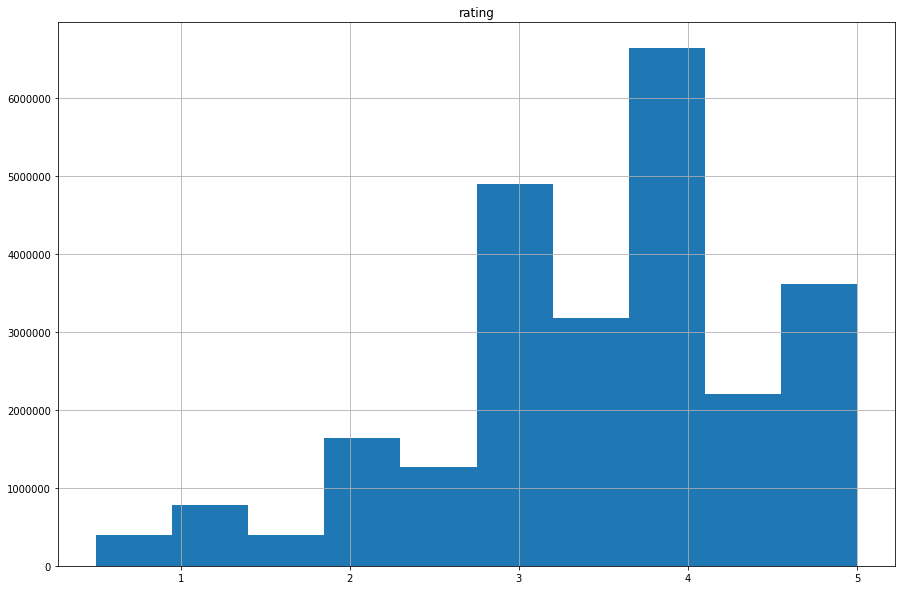

In [40]:
%matplotlib inline

ratings.hist(column='rating', figsize=(15,10))

In [ ]:
#ratings.boxplot(column='rating', figsize=(15,20)) Taking too long to execute

<h1 style="font-size:2em;color:#2467C0">Slicing Out Columns</h1>
 

In [42]:
tags['tag'].head()

0             classic
1              sci-fi
2         dark comedy
3      great dialogue
4    so bad it's good
Name: tag, dtype: object

In [44]:
tags['movieId'].tail()

1093355     66934
1093356    103341
1093357    189169
1093358    189169
1093359    189169
Name: movieId, dtype: int64

In [46]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [48]:
ratings[-10:]

,userId,movieId,rating
25000085,162541,8983,4.5
25000086,162541,31658,4.5
25000087,162541,33794,4.0
25000088,162541,41566,4.0
25000089,162541,45517,4.5
25000090,162541,50872,4.5
25000091,162541,55768,2.5
25000092,162541,56176,2.0
25000093,162541,58559,4.0
25000094,162541,63876,5.0


In [56]:
tag_counts = tags['tag'].value_counts()
tag_counts[-10:]

limited animation              1
Good sci fi movie              1
Writer: Roland Laos            1
Mel Smith                      1
Bruce Gowers                   1
saw this about 25 years ago    1
Mischief                       1
afterwar                       1
single character               1
acrobatics                     1
Name: tag, dtype: int64

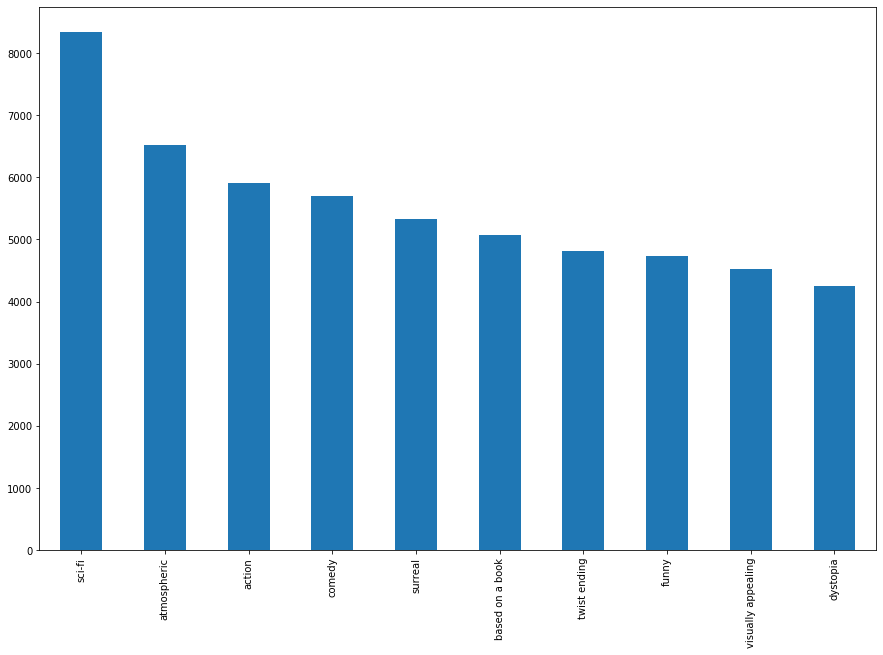

In [51]:
tag_counts[:10].plot(kind='bar', figsize=(15,10))

<h1 style="font-size:2em;color:#2467C0">Filters for Selecting Rows</h1>

In [9]:
is_highly_rated = ratings['rating'] >= 4.0

ratings[is_highly_rated][30:50]

,userId,movieId,rating
49,1,7365,4.0
54,1,7940,4.5
56,1,8154,5.0
57,1,8327,5.0
58,1,8360,4.0
62,1,8786,4.0
64,1,8973,4.0
66,1,27266,4.5
69,1,32591,5.0
72,2,110,5.0


In [10]:
is_animation = movies['genres'].str.contains('Animation')

movies[is_animation][5:15]

,movieId,title,genres
309,313,"Swan Princess, The (1994)",Animation|Children
359,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
387,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
545,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
551,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
580,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
586,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical
587,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
588,596,Pinocchio (1940),Animation|Children|Fantasy|Musical
602,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi


In [11]:
movies[is_animation].head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
309,313,"Swan Princess, The (1994)",Animation|Children
359,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
387,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
545,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
551,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


<h1 style="font-size:2em;color:#2467C0">Group By and Aggregate </h1>

In [18]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,393068
1.0,776815
1.5,399490
2.0,1640868
2.5,1262797
3.0,4896928
3.5,3177318
4.0,6639798
4.5,2200539


In [20]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [47]:
tags.head(15)

,userId,movieId,tag
0,3,260,classic
1,3,260,sci-fi
2,4,1732,dark comedy
3,4,1732,great dialogue
4,4,7569,so bad it's good
5,4,44665,unreliable narrators
6,4,115569,tense
7,4,115713,artificial intelligence
8,4,115713,philosophical
9,4,115713,tense


In [25]:
ratings.head()

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.5
2,1,307,5.0
3,1,665,5.0
4,1,899,3.5


In [76]:
total_tags = tags[['movieId', 'tag']].groupby('movieId').count()
total_tags.head(15)
#total_tags


,tag
movieId,
1,697
2,180
3,29
4,11
5,24
6,621
7,73
8,7
9,13


In [39]:
rand = movies[['movieId','title', 'genres']].groupby('genres').max().head()
rand

,movieId,title
genres,,
(no genres listed),209169,줄탁동시 (2012)
Action,206129,Zebra Force (1976)
Action|Adventure,206851,Yojimbo (1961)
Action|Adventure|Animation,207027,The Death and Return of Superman (2019)
Action|Adventure|Animation|Children,187541,Pokémon: Jirachi Wish Maker (2003)


In [13]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.893708
2,3.251527
3,3.142028
4,2.853547
5,3.058434


In [14]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,57309
2,24228
3,11804
4,2523
5,11714


In [15]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

,rating
movieId,
209157,1
209159,1
209163,1
209169,1
209171,1


<h1 style="font-size:2em;color:#2467C0">Merge Dataframes</h1>

In [77]:
tags.head()

,userId,movieId,tag
0,3,260,classic
1,3,260,sci-fi
2,4,1732,dark comedy
3,4,1732,great dialogue
4,4,7569,so bad it's good


In [79]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [85]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,791,Owned
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1048,imdb top 250
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1361,Pixar
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3164,Pixar
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3164,time travel


In [89]:
combine = movies.merge(ratings, on='movieId', how='inner')
del combine['userId']
combine.head() 
#ratings

More examples: http://pandas.pydata.org/pandas-docs/stable/merging.html

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>


Combine aggreagation, merging, and filters to get useful analytics
</p>

In [80]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.893708
1,2,3.251527
2,3,3.142028
3,4,2.853547
4,5,3.058434


In [81]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
59042,209157,We (2018),Drama,1.5
59043,209159,Window of the Soul (2001),Documentary,3.0
59044,209163,Bad Poems (2018),Comedy|Drama,4.5
59045,209169,A Girl Thing (2001),(no genres listed),3.0
59046,209171,Women of Devil's Island (1962),Action|Adventure|Drama,3.0


In [82]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated][-5:]

,movieId,title,genres,rating
59027,209121,Adrenalin: The BMW Touring Car Story (2014),Documentary,4.0
59028,209123,Square Roots: The Story of SpongeBob SquarePan...,Documentary,4.0
59029,209129,Destination Titan (2011),Documentary,4.5
59041,209155,Santosh Subramaniam (2008),Action|Comedy|Romance,5.0
59044,209163,Bad Poems (2018),Comedy|Drama,4.5


In [83]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547
4,5,Father of the Bride Part II (1995),Comedy,3.058434
6,7,Sabrina (1995),Comedy|Romance,3.363666


In [84]:
box_office[is_comedy & is_highly_rated][-5:]

,movieId,title,genres,rating
58990,208911,Cheating in Chains (2006),Comedy,4.0000
58998,208939,Klaus (2019),Adventure|Animation|Children|Comedy,4.3125
59001,208945,Powder (2019),Comedy|Drama,4.5000
59041,209155,Santosh Subramaniam (2008),Action|Comedy|Romance,5.0000
59044,209163,Bad Poems (2018),Comedy|Drama,4.5000


<h1 style="font-size:2em;color:#2467C0">Vectorized String Operations</h1>


In [ ]:
movies.head()

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Split 'genres' into multiple columns

<br> </p>

In [ ]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [ ]:
movie_genres[:10]

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Add a new column for comedy genre flag

<br> </p>

In [ ]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [ ]:
movie_genres[:10]

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Extract year from title e.g. (1995)

<br> </p>

In [ ]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [ ]:
movies.tail()

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

More here: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods
<br> </p>

<h1 style="font-size:2em;color:#2467C0">Parsing Timestamps</h1>

Timestamps are common in sensor data or other time series datasets.
Let us revisit the *tags.csv* dataset and read the timestamps!


In [ ]:
tags = pd.read_csv('./movielens/tags.csv', sep=',')

In [ ]:
tags.dtypes

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Unix time / POSIX time / epoch time records 
time in seconds <br> since midnight Coordinated Universal Time (UTC) of January 1, 1970
</p>

In [ ]:
tags.head(5)

In [ ]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Data Type datetime64[ns] maps to either <M8[ns] or >M8[ns] depending on the hardware

</p>

In [ ]:

tags['parsed_time'].dtype

In [ ]:
tags.head(2)

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Selecting rows based on timestamps
</p>

In [ ]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Sorting the table using the timestamps
</p>

In [ ]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

<h1 style="font-size:2em;color:#2467C0">Average Movie Ratings over Time </h1>
## Are Movie ratings related to the year of launch?

In [ ]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

In [ ]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()
joined.corr()

In [ ]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

In [ ]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Do some years look better for the boxoffice movies than others? <br><br>

Does any data point seem like an outlier in some sense?

</p>